In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Cleaning up Unnecessary Columns



In [4]:
df = df.drop(['channelId','thumbnail_link'], axis=1)

In [5]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...


## Checking through the files to see when are the videos published

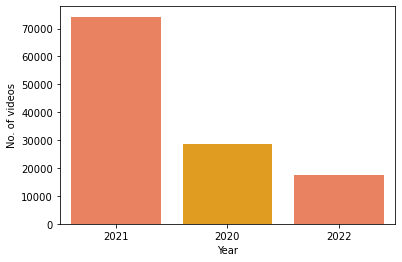

In [6]:
cdf = df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publishedAt": "No_of_videos"})

fig, ax = plt.subplots()
_ = sb.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

### By looking through the data, we have found out that there are videos that are trending for multiple days, they are shown by the repeated entries with the same "video_ID".

### We created a new column "Number_of_days_it trended", where we count the number of times the same publishing date has appeared, which we later removed the video_ID column as it is not useful for the analysis.

In [7]:
df['Number_of_days_it_trended'] = df.groupby(['publishedAt'])['view_count'].transform('count')
df = df.drop(['video_id'], axis=1)
df.head(n=10)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Number_of_days_it_trended
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,7
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",5
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False,I left youtube for a month and this is what ha...,7
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,5
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False,Transforming The LaBrant Family's empty white ...,6
5,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,False,False,Subscribe To My Channel - https://www.youtube....,6
6,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,False,False,Hi babygirls! Thank you so much for watching ...,6
7,CGP Grey was WRONG,2020-08-11T17:15:11Z,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...,6
8,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,False,False,"Since I was little, i've had these goals for m...",6
9,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,6


### Removed the duplicates to show the overall individual videos that trended across how many days did they trended

In [8]:
df = df.drop_duplicates(subset=['publishedAt'],keep="last")
df.head(n =10)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Number_of_days_it_trended
173,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,How To Cook That,24,2020-08-12T00:00:00Z,cake rescue|caek fail|viral cake fails|funny c...,938198,44088,565,2409,False,False,"Cake Rescue: viral cake fails, how to rescue ...",1
174,"Son, lemme teach you something new",2020-08-06T19:47:12Z,Bread Boys,24,2020-08-12T00:00:00Z,[None],1722152,169501,927,7263,False,False,badum tss *funny haha noises*YOU CAN FIND US H...,1
175,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,ABC News,25,2020-08-12T00:00:00Z,president|trump|donald|executive|orders|stimul...,1090847,10922,2517,9876,False,False,The president’s order includes unemployment re...,1
176,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,Warner Bros. Pictures,24,2020-08-12T00:00:00Z,warner bros|warner brothers|wb|fred hampton|wi...,971704,23311,1987,3240,False,False,Watch the trailer for Judas and the Black Mess...,1
177,Juventus vs. Lyon | CHAMPIONS LEAGUE Round of ...,2020-08-07T21:25:58Z,Champions League on CBS Sports,17,2020-08-12T00:00:00Z,Lyon|Juventus|Juventus vs. Lyon|lyon vs juvent...,764778,6771,292,2450,False,False,Juventus' Champions League hopes had been up i...,1
178,Yashahime: Princess Half-Demon | Official Anno...,2020-08-07T03:00:02Z,vizmedia,1,2020-08-12T00:00:00Z,viz media|anime|official|manga|yashahime|inuya...,740830,34199,280,3413,False,False,Yashahime: Princess Half-Demon arrives October...,1
179,Russ - Why (Official Video),2020-08-07T05:24:50Z,Russ,10,2020-08-12T00:00:00Z,Russ|WHY|MusicVideo,761871,52139,910,2879,False,False,Official music video for Russ Why - available ...,1
180,Explained: What happened in deadly Beirut expl...,2020-08-05T21:01:33Z,Sky News,25,2020-08-12T00:00:00Z,BEIRUT|LEBANON|MIDDLE EAST|EXPLOSION|BLAST|SKY...,8496552,74508,3034,11855,False,False,The size of the explosion that ripped through ...,1
181,Forgive Me - Live - Chloe x Halle,2020-08-07T01:45:25Z,Chloe x Halle,24,2020-08-12T00:00:00Z,chloeandhalle|Chloe|halle|Chloexhalle|Chloe x ...,776252,91286,674,4811,False,False,Watch the Forgive Me music video here: https:/...,1
182,Haschak Sisters - GLOW (Music Video),2020-08-06T19:28:57Z,Haschak Sisters,10,2020-08-12T00:00:00Z,GLOW|glow|haschak sisters|glow haschak sisters...,1436087,47984,1313,4510,False,False,Hi Guys! Hope you enjoy our new #GLOW music v...,1


### Removing videos that has 0 views as these entries would affect the outcome of the prediction of trending videos.

In [9]:
df = df[df.view_count != 0]

In [10]:
df.head(n=10)

,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Number_of_days_it_trended
173,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,How To Cook That,24,2020-08-12T00:00:00Z,cake rescue|caek fail|viral cake fails|funny c...,938198,44088,565,2409,False,False,"Cake Rescue: viral cake fails, how to rescue ...",1
174,"Son, lemme teach you something new",2020-08-06T19:47:12Z,Bread Boys,24,2020-08-12T00:00:00Z,[None],1722152,169501,927,7263,False,False,badum tss *funny haha noises*YOU CAN FIND US H...,1
175,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,ABC News,25,2020-08-12T00:00:00Z,president|trump|donald|executive|orders|stimul...,1090847,10922,2517,9876,False,False,The president’s order includes unemployment re...,1
176,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,Warner Bros. Pictures,24,2020-08-12T00:00:00Z,warner bros|warner brothers|wb|fred hampton|wi...,971704,23311,1987,3240,False,False,Watch the trailer for Judas and the Black Mess...,1
177,Juventus vs. Lyon | CHAMPIONS LEAGUE Round of ...,2020-08-07T21:25:58Z,Champions League on CBS Sports,17,2020-08-12T00:00:00Z,Lyon|Juventus|Juventus vs. Lyon|lyon vs juvent...,764778,6771,292,2450,False,False,Juventus' Champions League hopes had been up i...,1
178,Yashahime: Princess Half-Demon | Official Anno...,2020-08-07T03:00:02Z,vizmedia,1,2020-08-12T00:00:00Z,viz media|anime|official|manga|yashahime|inuya...,740830,34199,280,3413,False,False,Yashahime: Princess Half-Demon arrives October...,1
179,Russ - Why (Official Video),2020-08-07T05:24:50Z,Russ,10,2020-08-12T00:00:00Z,Russ|WHY|MusicVideo,761871,52139,910,2879,False,False,Official music video for Russ Why - available ...,1
180,Explained: What happened in deadly Beirut expl...,2020-08-05T21:01:33Z,Sky News,25,2020-08-12T00:00:00Z,BEIRUT|LEBANON|MIDDLE EAST|EXPLOSION|BLAST|SKY...,8496552,74508,3034,11855,False,False,The size of the explosion that ripped through ...,1
181,Forgive Me - Live - Chloe x Halle,2020-08-07T01:45:25Z,Chloe x Halle,24,2020-08-12T00:00:00Z,chloeandhalle|Chloe|halle|Chloexhalle|Chloe x ...,776252,91286,674,4811,False,False,Watch the Forgive Me music video here: https:/...,1
182,Haschak Sisters - GLOW (Music Video),2020-08-06T19:28:57Z,Haschak Sisters,10,2020-08-12T00:00:00Z,GLOW|glow|haschak sisters|glow haschak sisters...,1436087,47984,1313,4510,False,False,Hi Guys! Hope you enjoy our new #GLOW music v...,1


## Converted the file after cleaning

In [11]:
df.to_csv("same_publishing_timing.csv", index = False)

### Through data cleaning, we are able to see the bigger picture on what are the factors that we are able to use to determine whether the video is trending or not.